## Assortativity

In [1]:
import graph_tool.all as gt
import networkx as nx
import igraph as ig
import numpy as np
import glob
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns; sns.set_style('white')
import sys; sys.path.append('../')
from time import time
import logging

In [2]:
from VRG.src.utils import load_pickle, nx_to_igraph
from VRG.src.graph_stats import GraphStats
from VRG.src.graph_comparison import GraphPairCompare
from VRG.runner import get_clustering

sys path:  ['/Users/satyaki/PycharmProjects/Attributed-VRG/notebooks', '/Users/satyaki/miniconda3/envs/VRG/lib/python37.zip', '/Users/satyaki/miniconda3/envs/VRG/lib/python3.7', '/Users/satyaki/miniconda3/envs/VRG/lib/python3.7/lib-dynload', '', '/Users/satyaki/miniconda3/envs/VRG/lib/python3.7/site-packages', '/Users/satyaki/miniconda3/envs/VRG/lib/python3.7/site-packages/IPython/extensions', '/Users/satyaki/.ipython', '../', './../', './../../']


In [11]:
%matplotlib inline

# GraphTool

In [5]:
data = gt.collection.ns_info

{'7th_graders': {'title': 'Vickers 7th Graders (1981)',
  'description': "A small multiplex network of friendships among 29 seventh grade students in Victoria, Australia. Students nominated classmates for three different activities (who do you get on with in the class, who are your best friends, and who would you prefer to work with). Edge direction for each of these three types of edges indicates if node i nominated node j, and the edge weight gives the frequency of this nomination. Students 1-12 are boys and 13-29 are girls. The KONECT version of this network is the collapse of de Domenico's multiplex version.[^icon]\n[^icon]: Description obtained from the [ICON](https://icon.colorado.edu) project.",
  'citation': [['M. Vickers and S. Chan, "Representing Classroom Social Structure." Melbourne: Victoria Institute of Secondary Education, (1981).',
    'https://www.google.com/search?q=M.+Vickers+%26+S.+Chan%2C+"Representing+Classroom+Social+Structure."+Melbourne%3A+Victoria+Institute+of

In [9]:
data.keys()

['7th_graders',
 'academia_edu',
 'add_health',
 'adjnoun',
 'advogato',
 'amazon_copurchases',
 'amazon_ratings',
 'ambassador',
 'anybeat',
 'arxiv_authors',
 'arxiv_citation',
 'arxiv_collab',
 'as_skitter',
 'baidu',
 'baseball',
 'bible_nouns',
 'bibsonomy',
 'bison',
 'bitcoin',
 'bitcoin_alpha',
 'bitcoin_trust',
 'blumenau_drug',
 'board_directors',
 'bookcrossing',
 'budapest_connectome',
 'caida_as',
 'cattle',
 'celegans_2019',
 'celegans_interactomes',
 'celegans_metabolic',
 'celegansneural',
 'ceo_club',
 'chess',
 'chicago_road',
 'citeseer',
 'citeulike',
 'college_freshmen',
 'collins_yeast',
 'contact',
 'contiguous_usa',
 'copenhagen',
 'cora',
 'corporate_directors',
 'crime',
 'cs_department',
 'dblp_author_paper',
 'dblp_cite',
 'dblp_coauthor',
 'dblp_coauthor_snap',
 'dblp_simplices',
 'dbpedia_all',
 'dbpedia_country',
 'dbpedia_genre',
 'dbpedia_link',
 'dbpedia_location',
 'dbpedia_occupation',
 'dbpedia_producer',
 'dbpedia_recordlabel',
 'dbpedia_starring',

In [10]:
g = gt.collection.ns['polbooks']

In [12]:
print(g)

<Graph object, undirected, with 105 vertices and 441 edges, 3 internal vertex properties, 6 internal graph properties, at 0x7f8349567050>


In [13]:
g.graph_properties

{'name': <GraphPropertyMap object with value type 'string', for Graph 0x7f8349567050, at 0x7f8328b97410>, 'description': <GraphPropertyMap object with value type 'string', for Graph 0x7f8349567050, at 0x7f8328b974d0>, 'citation': <GraphPropertyMap object with value type 'string', for Graph 0x7f8349567050, at 0x7f8328b97750>, 'url': <GraphPropertyMap object with value type 'string', for Graph 0x7f8349567050, at 0x7f8328b97a90>, 'tags': <GraphPropertyMap object with value type 'vector<string>', for Graph 0x7f8349567050, at 0x7f8328b97210>, 'directed': <GraphPropertyMap object with value type 'double', for Graph 0x7f8349567050, at 0x7f8328b97f10>}

In [14]:
print(g.gp.description)

A network of books about U.S. politics published close to the 2004 U.S. presidential election, and sold by Amazon.com. Edges between books represent frequent copurchasing of those books by the same buyers. The network was compiled by V. Krebs and is unpublished.


In [15]:
for prop, prop_map in g.vertex_properties.items():
    print(prop, list(prop_map)[: 5])
    print()

label ['1000 Years for Revenge', 'Bush vs. the Beltway', "Charlie Wilson's War", 'Losing Bin Laden', 'Sleeping With the Devil']

value ['n', 'c', 'c', 'c', 'n']

_pos [array([-17.19886344,  -0.70297288]), array([-17.15006302,  -0.58652376]), array([-17.34341253,  -0.79697238]), array([-16.88916057,  -0.71486095]), array([-17.19819119,  -1.02559267])]



In [16]:
g = gt.extract_largest_component(g)

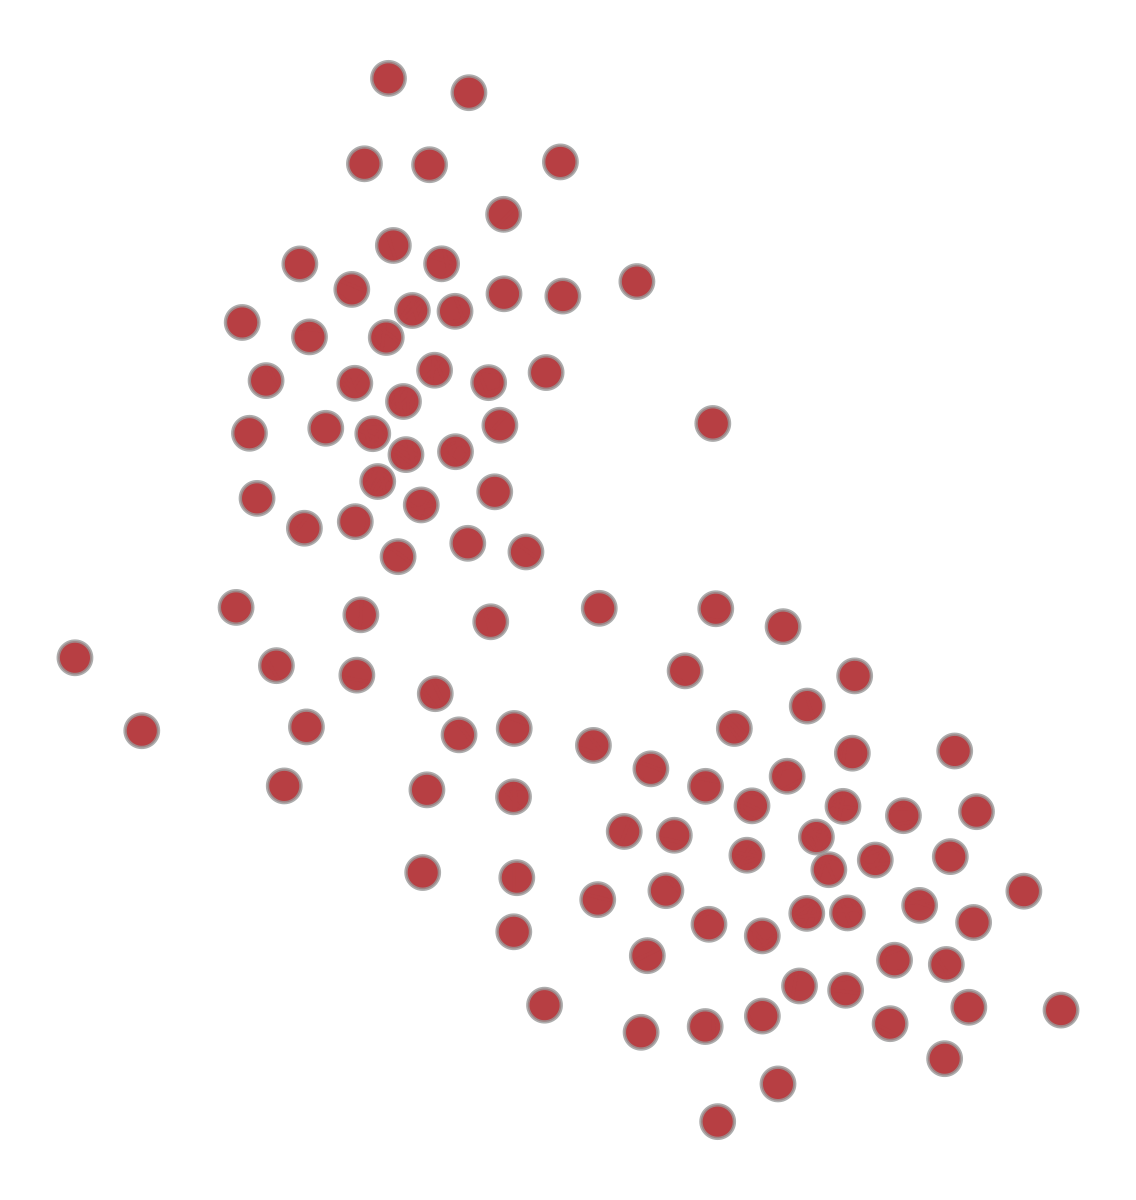

In [20]:
gt.graph_draw(g, edge_color='white', pos=g.vp._pos);

In [21]:
g.num_vertices(), g.num_edges()

(105, 441)

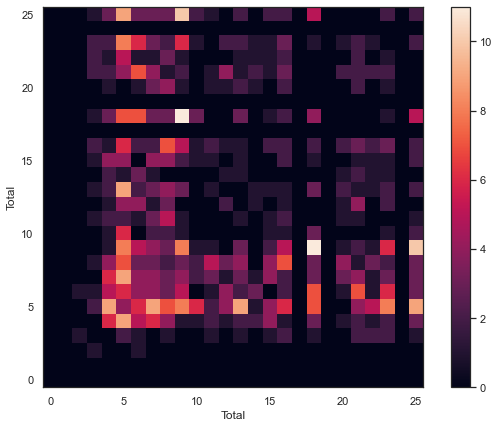

In [22]:
plt.rcParams['figure.figsize'] = (10, 7)
h = gt.corr_hist(g, 'total', 'total')
plt.xlabel('Total')
plt.ylabel('Total')
plt.imshow(h[0].T, interpolation='nearest', origin='lower');
plt.colorbar();

In [33]:
list(g.vp.keys())

['label', 'value', '_pos']

In [41]:
g.vp.value.get_array()

In [34]:
plt.rcParams['figure.figsize'] = (10, 7)
h = gt.corr_hist(g, g.vp.value, g.vp.value)
plt.xlabel('Total')
plt.ylabel('Total')
plt.imshow(h[0].T, interpolation='nearest', origin='lower');
plt.colorbar();

RuntimeError: No static implementation was found for the desired routine. This is a graph_tool bug. :-( Please submit a bug report at http://graph-tool.skewed.de/issues. What follows is debug information.

Action: graph_tool::get_correlation_histogram<graph_tool::GetNeighborsPairs>

Arg 1: std::__1::reference_wrapper<boost::filt_graph<boost::undirected_adaptor<boost::adj_list<unsigned long> >, graph_tool::detail::MaskFilter<boost::unchecked_vector_property_map<unsigned char, boost::adj_edge_index_property_map<unsigned long> > >, graph_tool::detail::MaskFilter<boost::unchecked_vector_property_map<unsigned char, boost::typed_identity_property_map<unsigned long> > > > >

Arg 2: graph_tool::scalarS<boost::checked_vector_property_map<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, boost::typed_identity_property_map<unsigned long> > >

Arg 3: graph_tool::scalarS<boost::checked_vector_property_map<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, boost::typed_identity_property_map<unsigned long> > >

Arg 4: graph_tool::UnityPropertyMap<int, boost::detail::adj_edge_descriptor<unsigned long> >



In [23]:
list(g.vp.keys())

['label', 'value', '_pos']

In [42]:
gt.assortativity(g, g.vp.value)

(0.7233077584970601, 0.02815094042581091)

In [25]:
gt.assortativity(g, 'total')

(-0.019843613103101652, 0.010624130416112487)

In [26]:
gt.scalar_assortativity(g, 'total')

(-0.12789600966672013, 0.09793848068597145)

In [27]:
h1 = gt.combined_corr_hist(g, 'total', 'total')

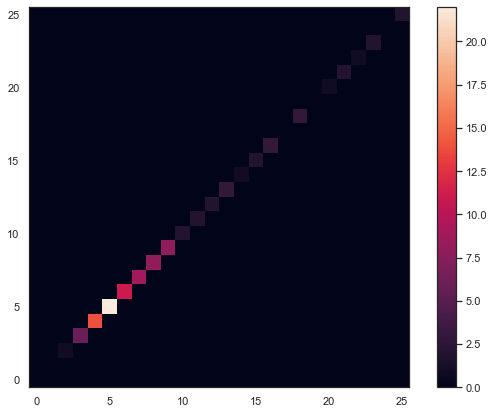

In [28]:
plt.imshow(h1[0].T, interpolation='nearest', origin='lower');
plt.colorbar();

In [29]:
h3 = gt.avg_neighbor_corr(g, 'total', 'total')

# NetworkX

In [3]:
g = nx.read_gml('../VRG/input/polbooks.gml')

In [5]:
nx.attribute_mixing_dict(g, attribute='value')

{'n': {'c': 34, 'n': 18, 'l': 24},
 'c': {'n': 34, 'c': 380, 'l': 12},
 'l': {'n': 24, 'l': 344, 'c': 12}}

In [29]:
att = nx.attribute_mixing_matrix(g, attribute='value', mapping=dict(n=0, c=1, l=2), normalized=False).astype(int)

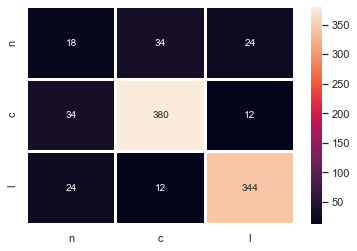

In [31]:
sns.heatmap(att, linewidths=2, xticklabels=['n', 'c', 'l'], yticklabels=['n', 'c', 'l'],
           annot=True, fmt='d');

In [47]:
deg_mat = nx.degree_mixing_matrix(g, normalized=False)

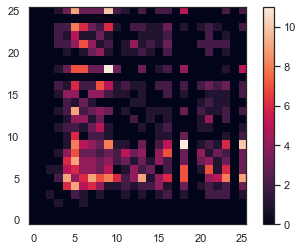

In [52]:
plt.imshow(deg_mat, origin='lower', interpolation='antialiased');
plt.colorbar();